# Wine 데이터셋을 활용한 PCA

## 데이터셋

In [1]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url, sep=',', index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [2]:
wine.columns, len(wine.columns)

(Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol', 'quality', 'color'],
       dtype='object'),
 13)

In [3]:
wine_y = wine['color']
wine_x = wine.drop(['color'], axis=1)
wine_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## StandardScaler

In [5]:
from sklearn.preprocessing import StandardScaler

wine_ss = StandardScaler().fit_transform(wine_x)
wine_ss[:3]

array([[ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, -0.59764007,  1.1979747 ,
        -0.31132009, -0.86246863,  0.70148631, -0.11507303,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, -0.66069923,  1.02669737,
        -0.87476278, -1.09248586,  0.76818761,  0.25811972,  0.79795816,
        -0.58006813, -0.93722961]])

## PCA fit => components=2

In [4]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=2) :
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

In [7]:
pca_wine, pca = get_pca_data(wine_ss, n_components=2)


wine_ss.shape, pca_wine.shape

((6497, 12), (6497, 2))

In [9]:
pca.explained_variance_ratio_

array([0.25346226, 0.22082117])

## 2차원으로 축소된 두 개의 특성 시각화

In [22]:
pca_columns = ['pca_component_1', 'pca_component_2']
pca_wine_pd = pd.DataFrame(pca_wine, columns=pca_columns)
pca_wine_pd['color'] = wine_y.values

pca_wine_pd

,pca_component_1,pca_component_2,color
0,-3.348438,0.568926,1
1,-3.228595,1.197335,1
2,-3.237468,0.952580,1
3,-1.672561,1.600583,1
4,-3.348438,0.568926,1
...,...,...,...
6492,0.112718,-1.912247,0
6493,1.720296,1.009571,0
6494,0.626922,-0.622145,0
6495,0.491934,-3.755928,0


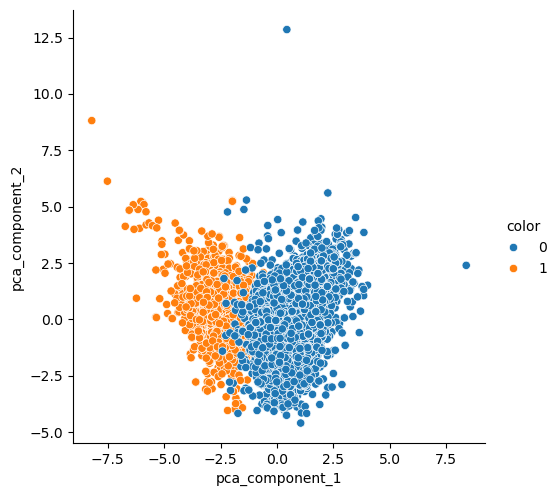

In [23]:
import seaborn as sns

sns.pairplot(pca_wine_pd, hue='color', height=5,
             x_vars=['pca_component_1'], y_vars=['pca_component_2'])

## 주성분을 활용한 wine color 분류

### scaling된 데이터로 wine color 분류 및 검증 점수 확인

In [19]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def rf_scores(x, y, cv=5) :
    rf = RandomForestClassifier(random_state=13, n_estimators=100)
    scores_rf = cross_val_score(rf, x, y, scoring='accuracy', cv=cv)

    print('Score : ', np.mean(scores_rf))

rf_scores(wine_ss, wine_y)

Score :  0.9935352638124


In [24]:
pca_x = pca_wine_pd[['pca_component_1', 'pca_component_2']]

rf_scores(pca_x, wine_y)

Score :  0.981067803635933


## PCA fit => components=3

In [25]:
pca_wine, pca = get_pca_data(wine_ss, n_components=3)

pca.explained_variance_ratio_

array([0.25346226, 0.22082117, 0.13679223])

In [28]:
cols = ['pca_1', 'pca_2', 'pca_3']
pca_wine_pd = pd.DataFrame(pca_wine, columns=cols)

pca_x = pca_wine_pd[cols]
rf_scores(pca_x, wine_y)

Score :  0.9832236631728548


## plotly로 3차원 그래프 시각화

In [33]:
import plotly.express as px

pca_wine_plot = pca_x
pca_wine_plot['color'] = wine_y.values

fig = px.scatter_3d(pca_wine_plot, x='pca_1', y='pca_2', z='pca_3',
                    color='color', symbol='color', opacity=0.4)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()